In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [2]:
df = pd.read_csv('smartphones.csv')
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [3]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [5]:
# Ver a contagem de valores em falta para cada característica.
df.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [6]:
sum(df.duplicated())

0

In [7]:
df.nunique()

brand_name                    46
model                        980
price                        379
avg_rating                    30
5G_or_not                      2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
os                             3
primary_camera_rear           18
primary_camera_front          19
extended_memory_available      2
resolution_height             65
resolution_width              40
dtype: int64

In [8]:
df.mean(numeric_only=True)

price                        32520.504082
avg_rating                       7.825825
5G_or_not                        0.560204
num_cores                        7.772074
processor_speed                  2.427217
battery_capacity              4817.748194
fast_charging_available          0.854082
fast_charging                   46.126138
ram_capacity                     6.560204
internal_memory                141.036735
screen_size                      6.536765
refresh_rate                    92.256122
num_rear_cameras                 2.814286
primary_camera_rear             50.319286
primary_camera_front            16.589744
extended_memory_available        0.630612
resolution_height             2214.663265
resolution_width              1075.852041
dtype: float64

In [9]:
df.groupby(["brand_name"])[['price']].sum()

#df.groupby(["brand_name"])[['model','price']].sum()


,price
brand_name,
apple,4414460
asus,522966
blackview,8990
blu,14990
cat,14999
cola,14999
doogee,60998
duoqin,9990
gionee,20688


# Média de Preço por Marca de Smartphone # 
# Average Price by Smartphone Brand #
 


In [10]:
# Calcula média de preço por marca
# Calculates average price per brand
mean_price_by_brand = df.groupby('brand_name')['price'].mean().reset_index()

In [11]:
# Ordena as marcas pela média de preço (do maior para o menor)
# Sorts brands by average price (from highest to lowest)
mean_price_by_brand = mean_price_by_brand.sort_values(by='price', ascending=False)

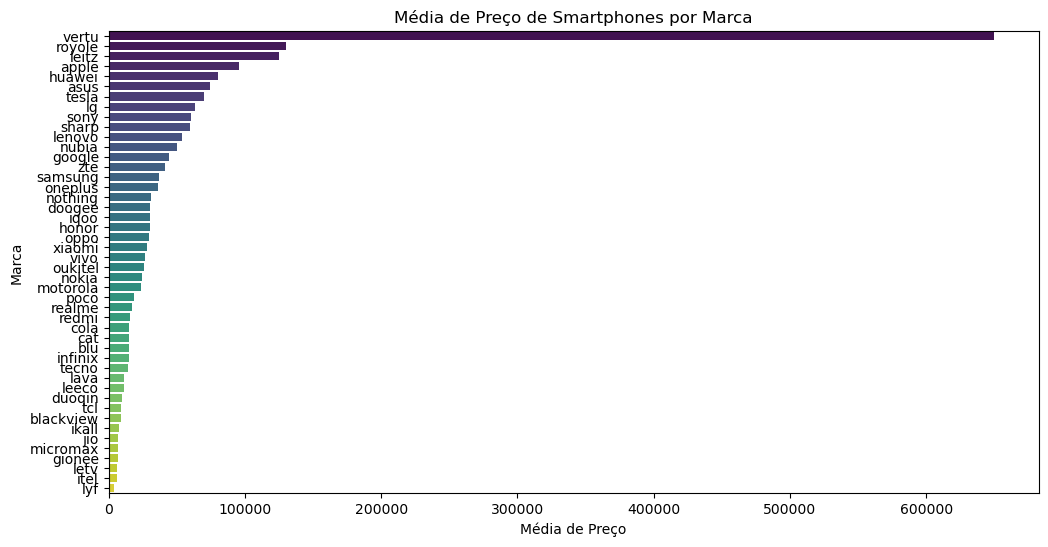

In [12]:
# Cria o gráfico de barras
# Creates the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_price_by_brand, x='price', y='brand_name', palette='viridis')
plt.xlabel('Média de Preço')
plt.ylabel('Marca')
plt.title('Média de Preço de Smartphones por Marca')
plt.show()

# Distribuição de Avaliações Médias #
# Distribution of Average Ratings #

In [13]:
# Configurações visuais
# Visual setting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

<Figure size 1000x600 with 0 Axes>

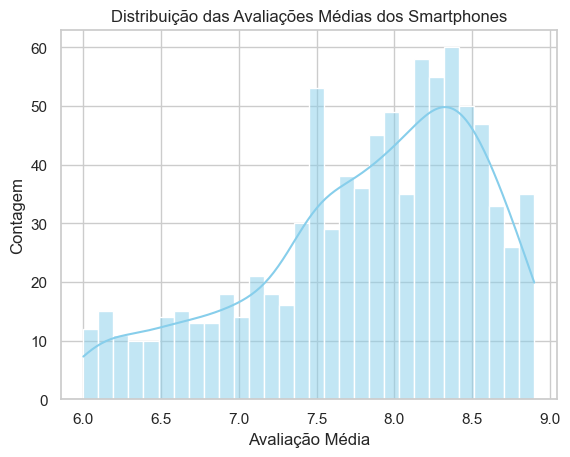

In [14]:
# Cria o histograma das avaliações médias
# Creates the histogram of the average ratings
sns.histplot(df['avg_rating'], bins=30, kde=True, color='skyblue')

# Adiciona rótulos e título
# Add labels and title
plt.xlabel('Avaliação Média')
plt.ylabel('Contagem')
plt.title('Distribuição das Avaliações Médias dos Smartphones')

plt.show()

# Relação entre Preço e Avaliação Média # 
# Relationship between Price and Average Valuation # 

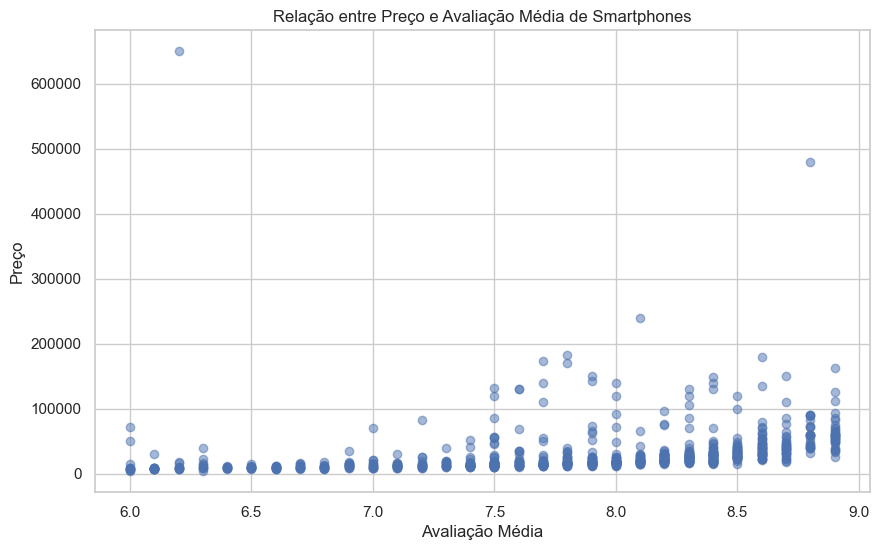

In [15]:
# Cria um gráfico de dispersão (scatter plot)
# Creates a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_rating'], df['price'], alpha=0.5)  # 'avg_rating' no eixo x, 'price' no eixo y
plt.title('Relação entre Preço e Avaliação Média de Smartphones')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.grid(True)

plt.show()

# Contagem de Smartphones 5G vs. Não 5G #
# Count of 5G vs. non-5G smartphones #

In [16]:
# Contagem de smartphones 5G e não 5G
# Count of 5G and non-5G smartphones
count_5g = df['5G_or_not'].sum()
count_non_5g = len(df) - count_5g

In [17]:
# Rótulos e valores para o gráfico de pizza
# Criação do gráfico de pizza
labels = ['5G', 'Não 5G']
sizes = [count_5g, count_non_5g]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explodir a fatia "5G" para destacá-la


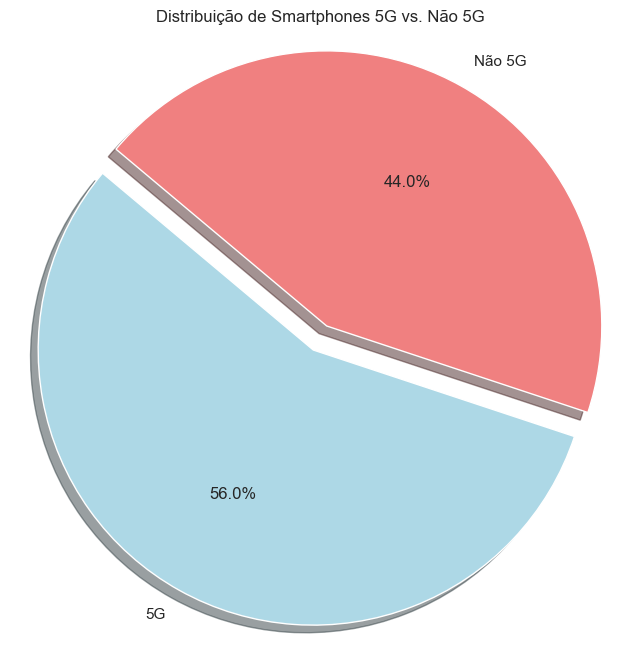

In [18]:
# Criação do gráfico de pizza
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribuição de Smartphones 5G vs. Não 5G')
plt.axis('equal')  # Assegura que o gráfico de pizza seja uma forma de círculo

plt.show()

In [19]:
# Crie um DataFrame que contenha a contagem de smartphones 5G e não 5G por marca
# Create a DataFrame containing the count of 5G and non-5G smartphones by brand
count_5g_by_brand = df.groupby(['brand_name', '5G_or_not'])['model'].count().reset_index()
count_5g_by_brand.columns = ['brand_name', '5G_or_not', 'count']


In [20]:
# Filtrar apenas os smartphones 5G (5G_or_not = 1)
# Filter only 5G smartphones (5G_or_not = 1)
count_5g_by_brand_5g = count_5g_by_brand[count_5g_by_brand['5G_or_not'] == 1]


In [21]:
# Filtrar apenas os smartphones não 5G (5G_or_not = 0)
# Filter only non-5G smartphones (5G_or_not = 0)
count_5g_by_brand_not_5g = count_5g_by_brand[count_5g_by_brand['5G_or_not'] == 0]


In [22]:
# Mesclar os dois DataFrames com base no nome da marca
# Merge the two DataFrames based on the brand name
merged_count_5g = count_5g_by_brand_5g.merge(count_5g_by_brand_not_5g, on='brand_name', suffixes=('_5g', '_not_5g'))


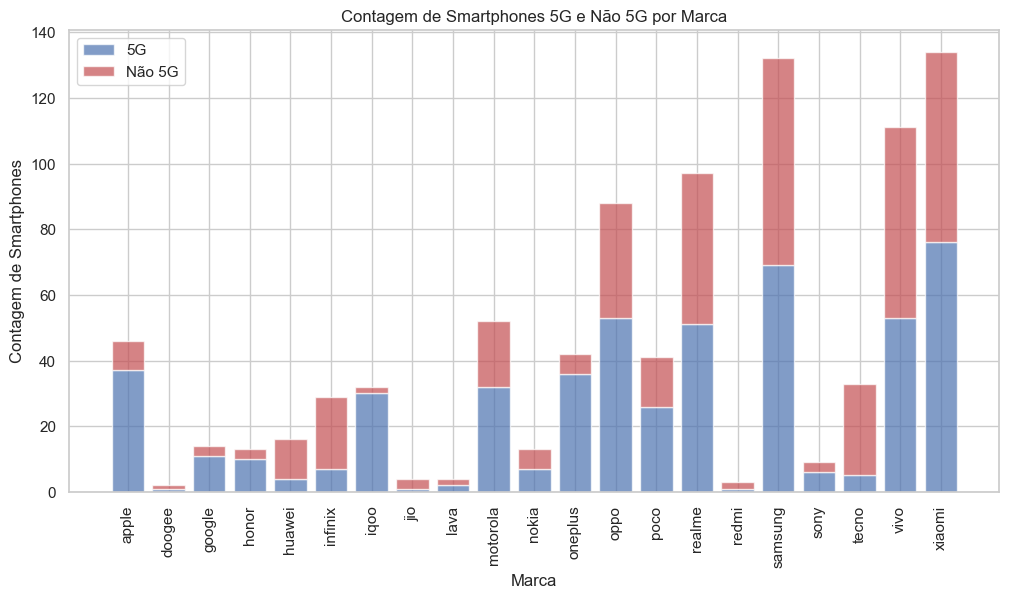

In [23]:
# Crie um gráfico de barras empilhadas
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_count_5g['brand_name'], merged_count_5g['count_5g'], label='5G', color='b', alpha=0.7)
plt.bar(merged_count_5g['brand_name'], merged_count_5g['count_not_5g'], bottom=merged_count_5g['count_5g'], label='Não 5G', color='r', alpha=0.7)
plt.xlabel('Marca')
plt.ylabel('Contagem de Smartphones')
plt.title('Contagem de Smartphones 5G e Não 5G por Marca')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Comparação entre Marcas em Recursos Específicos # 
# Comparing Brands on Specific Features # 

In [24]:

columns_of_interest = ['brand_name', 'ram_capacity', 'internal_memory', 'num_rear_cameras']


In [25]:
subset_df = df[columns_of_interest]

In [26]:
mean_by_brand = subset_df.groupby('brand_name').mean().reset_index()

In [27]:
mean_by_brand.set_index('brand_name', inplace=True)

In [28]:
mean_by_brand = mean_by_brand.T

<Figure size 1200x600 with 0 Axes>

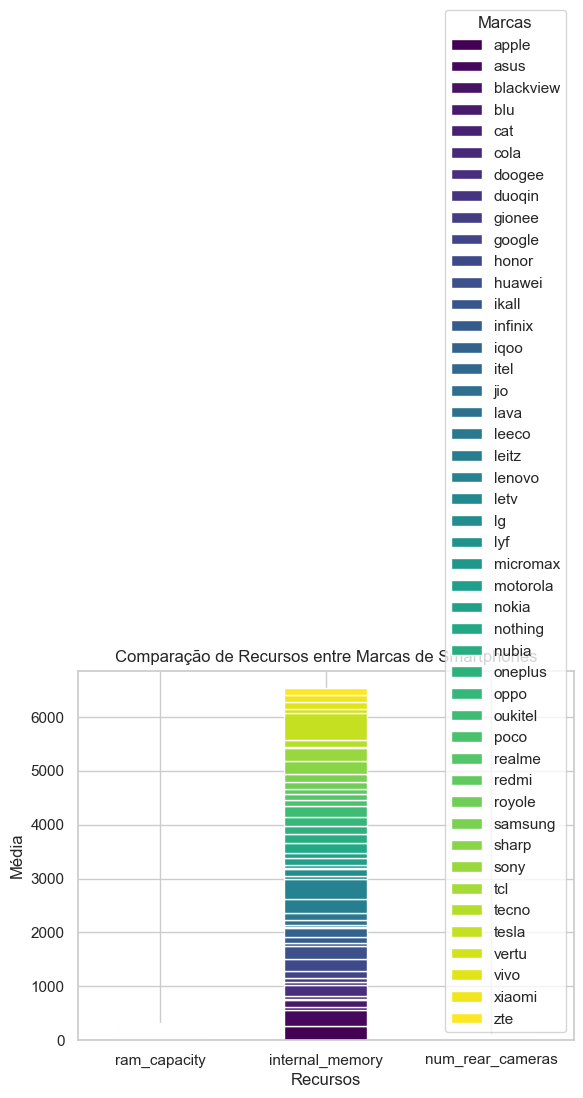

In [29]:
plt.figure(figsize=(12, 6))
mean_by_brand.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('Recursos')
plt.ylabel('Média')
plt.title('Comparação de Recursos entre Marcas de Smartphones')
plt.legend(title='Marcas')
plt.xticks(rotation=0)
plt.show()

# Média de Preço por Sistema Operacional #
# Average Price per Operating System #

In [30]:
# Calcula a média de preço por sistema operacional
# Calculates the average price per operating system
mean_price_by_os = df.groupby('os')['price'].mean().reset_index()


In [31]:
# Ordena os sistemas operacionais pela média de preço (do maior para o menor)
# Sorts operating systems by average price (from highest to lowest)
mean_price_by_os = mean_price_by_os.sort_values(by='price', ascending=False)

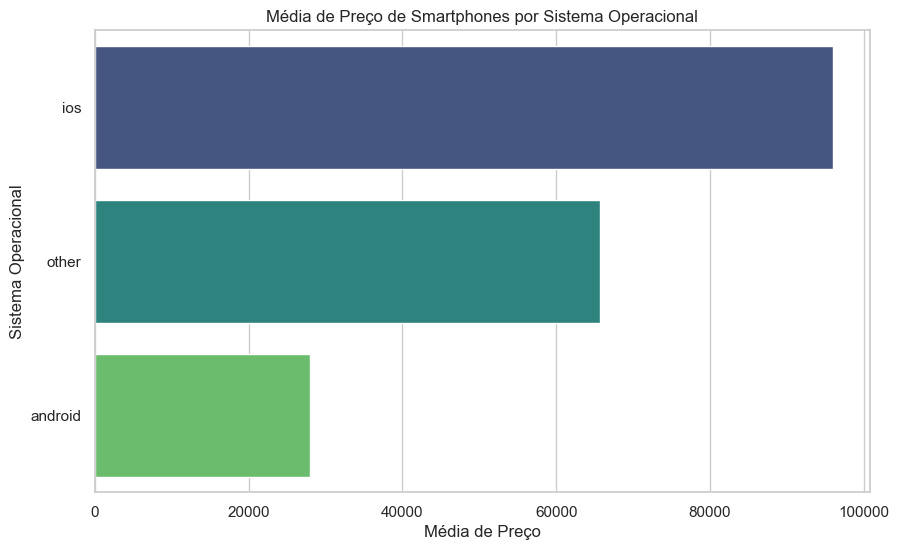

In [32]:
# Cria o gráfico de barras
# Creates the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_price_by_os, x='price', y='os', palette='viridis')
plt.xlabel('Média de Preço')
plt.ylabel('Sistema Operacional')
plt.title('Média de Preço de Smartphones por Sistema Operacional')
plt.show()

# Distribuição de Tamanho de Tela #  
# Screen Size Distribution #  

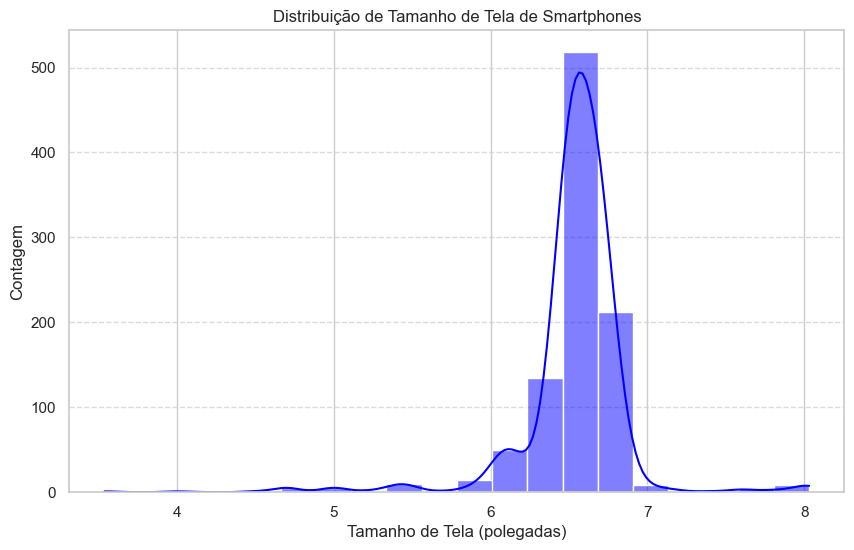

In [33]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.histplot(data=df, x='screen_size', bins=20, kde=True, color='blue')

plt.xlabel('Tamanho de Tela (polegadas)')  # Rótulo do eixo x
plt.ylabel('Contagem')  # Rótulo do eixo y
plt.title('Distribuição de Tamanho de Tela de Smartphones')  # Título do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Linhas de grade no eixo y

plt.show()

# Comparação de Resolução de Tela entre Marcas # 
# Screen Resolution Comparison between Brands # 

In [34]:
# Cria um DataFrame com as colunas 'brand_name' e 'resolution_width'
# Create a DataFrame with 'brand_name' and 'resolution_width' columns
resolution_data = df[['brand_name', 'resolution_width']]


In [35]:
# Ordenar as marcas pelo valor médio de resolução de tela
# Sort the brands by the average screen resolution value
sorted_brands = df.groupby('brand_name')['resolution_width'].mean().sort_values(ascending=False).index


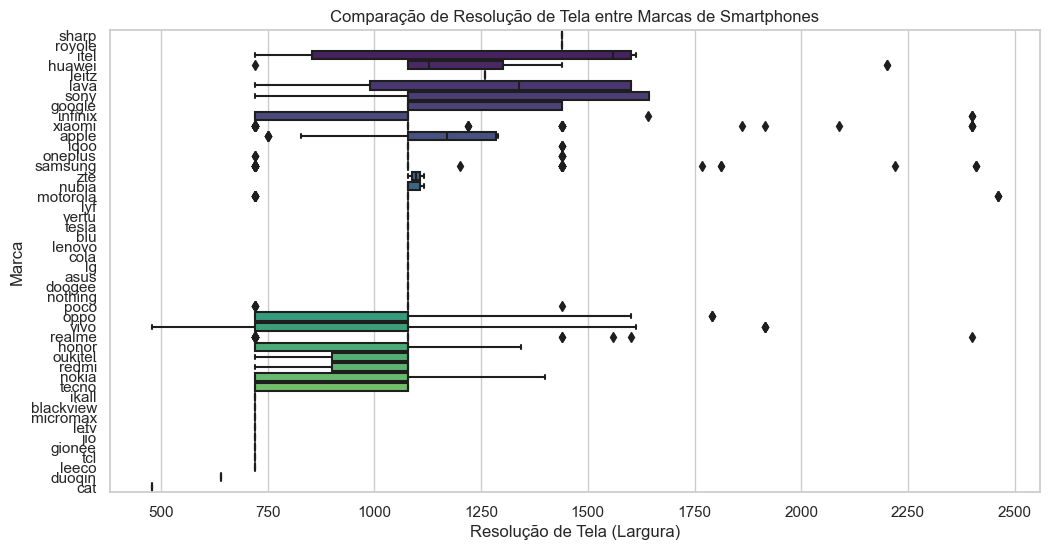

In [36]:
# Cria o gráfico de caixa (box plot)
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=resolution_data, x='resolution_width', y='brand_name', order=sorted_brands, palette='viridis')
plt.xlabel('Resolução de Tela (Largura)')  # Screen Resolution (Width)
plt.ylabel('Marca')  # Brand
plt.title('Comparação de Resolução de Tela entre Marcas de Smartphones')  # Comparison of Screen Resolution among Smartphone Brands
plt.show()

# Relação entre Capacidade da Bateria e Autonomia #
# Relationship between Battery Capacity and Autonomy #

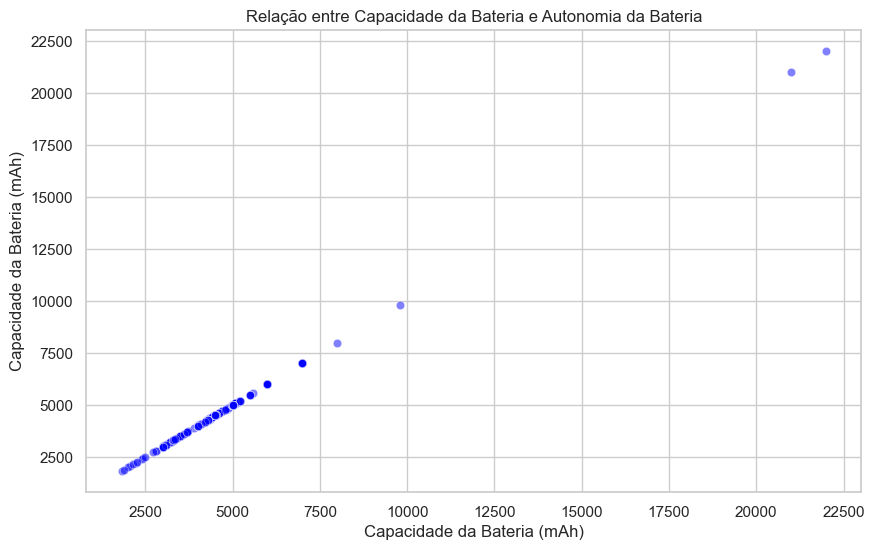

In [37]:
# Criando um gráfico de dispersão para a relação entre capacidade da bateria e autonomia
# Creating a scatter plot to visualize the relationship between battery capacity and battery life
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='battery_capacity', y='battery_capacity', alpha=0.5, color='blue')

plt.title('Relação entre Capacidade da Bateria e Autonomia da Bateria')
plt.xlabel('Capacidade da Bateria (mAh)')
plt.ylabel('Capacidade da Bateria (mAh)')

plt.show()

# Distribuição de Preços por Modelo #
# Price Distribution by Model #

In [38]:
modelos_por_marca = df.groupby('brand_name')['model'].nunique().reset_index()


In [39]:
modelos_por_marca = modelos_por_marca.sort_values(by='model', ascending=False)


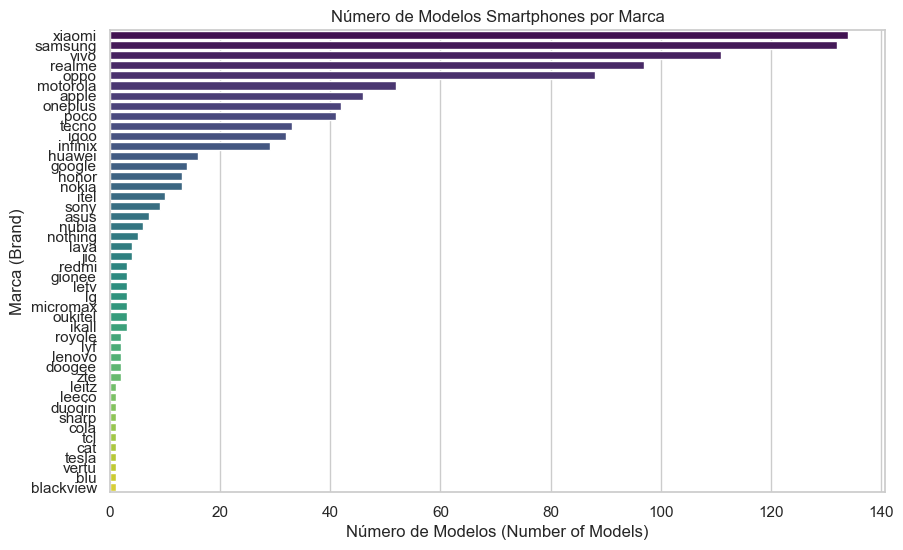

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=modelos_por_marca, y='brand_name', x='model', palette='viridis')

plt.xlabel('Número de Modelos (Number of Models)')
plt.ylabel('Marca (Brand)')
plt.title('Número de Modelos Smartphones por Marca')
plt.xticks(rotation=0)  # Rotação dos rótulos do eixo x (Rotation of x-axis labels)

  
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['processor_speed',
                                                   'battery_capacity',
                                                   'screen_size',
                                                   'ram_capacity',
                                                   'internal_memory']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand_name'])])),
                ('model', LinearRegression())])

Mean Squared Error (MSE): 222100834.4016933
R-squared (R2): 0.7929060836490758


In [51]:
df = pd.read_csv('smartphones.csv')
df.head(n=1)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828


In [52]:
# Defina o índice do DataFrame como a marca (Set the DataFrame index to 'brand_name')
modelos_por_marca.set_index('brand_name', inplace=True)

In [54]:
# Divida os dados em treinamento e teste (Split the data into training and testing)
tamanho_treinamento = int(len(modelos_por_marca) * 0.8)
treinamento = modelos_por_marca.iloc[:tamanho_treinamento]
teste = modelos_por_marca.iloc[tamanho_treinamento:]

In [55]:
# Crie um modelo de suavização exponencial para prever a popularidade da marca (Create an Exponential Smoothing model to predict brand popularity)
modelo = ExponentialSmoothing(treinamento, trend='add', seasonal='add', seasonal_periods=12)
resultado = modelo.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Faz previsões para o período de teste (Make predictions for the testing period)
previsoes = resultado.forecast(steps=len(teste))

In [ ]:
# Cria um DataFrame com as previsões (Create a DataFrame with the predictions)
previsoes_df = pd.DataFrame(previsoes, index=teste.index, columns=['Previsão'])


In [ ]:
# Plote os dados reais e as previsões (Plot the actual data and predictions)
plt.figure(figsize=(12, 6))
sns.lineplot(data=modelos_por_marca, marker='o', label='Dados Reais')
sns.lineplot(data=previsoes_df, marker='o', label='Previsões')
plt.xlabel('Marca (Brand)')
plt.ylabel('Número de Modelos (Number of Models)')
plt.title('Previsão de Popularidade da Marca de Smartphones')
plt.legend()
plt.xticks(rotation=45)
plt.show()